In [ ]:
#知识点
#1.查看数据基本情况
#2.查看各列数据分布
#3.绘制3D地图
#4.桑基图
#5.关系图
#6.城市航线图

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df0=pd.read_excel('D:/2022_py_code/04第4章/01国内航班数据.xls')

In [ ]:
#查看基本信息

In [3]:
print(df0.info())#查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   departure_city     15074 non-null  object 
 1   departure_cy       15074 non-null  float64
 2   departure_cx       15074 non-null  float64
 3   landing_city       15074 non-null  object 
 4   landing_cy         15074 non-null  float64
 5   landing_cx         15074 non-null  float64
 6   mileage            15074 non-null  int64  
 7   flight_schedules   15074 non-null  object 
 8   airlines           15074 non-null  object 
 9   aircraft_models    15074 non-null  object 
 10  departure_time     15074 non-null  object 
 11  landing_time       15074 non-null  object 
 12  departure_airport  15074 non-null  object 
 13  departure_y        15074 non-null  float64
 14  departure_x        15074 non-null  float64
 15  landing_airport    15074 non-null  object 
 16  landing_y          150

In [4]:
print(df0.isnull().sum())# 观察缺失值数量

departure_city          0
departure_cy            0
departure_cx            0
landing_city            0
landing_cy              0
landing_cx              0
mileage                 0
flight_schedules        0
airlines                0
aircraft_models         0
departure_time          0
landing_time            0
departure_airport       0
departure_y             0
departure_x             0
landing_airport         0
landing_y               0
landing_x               0
punctuality_rate        0
average_delayed      3040
is_mon                  0
is_tue                  0
is_wed                  0
is_thr                  0
is_fri                  0
is_sat                  0
is_sun                  0
dtype: int64


In [5]:
#统计航空公司分布柱状图

In [6]:
airlines=df0["airlines"].value_counts()#航空公司统计
print(airlines)

南方航空      2553
东方航空      1862
中国国航      1442
深圳航空      1183
厦门航空      1000
海南航空       982
山东航空       779
华夏航空       565
四川航空       468
天津航空       463
祥鹏航空       332
春秋航空       298
河北航空       292
吉祥航空       278
首都航空       268
昆明航空       239
成都航空       219
上海航空       214
西藏航空       212
幸福航空       195
长龙航空       167
东海航空       133
北部湾航空      111
西部航空        92
奥凯航空        90
福州航空        68
澳洲航空        67
九元航空        60
新西兰航空       52
多彩航空        52
大新华航空       50
瑞丽航空        46
扬子江航空       42
青岛航空        40
乌鲁木齐航空      30
英国航空        26
全日空航空       18
香港航空        17
重庆航空        17
红土航空        13
日本航空        13
联合航空         8
江西航空         4
桂林航空         4
夏威夷航空        3
酷航           3
北欧航空         2
长安航空         2
Name: airlines, dtype: int64


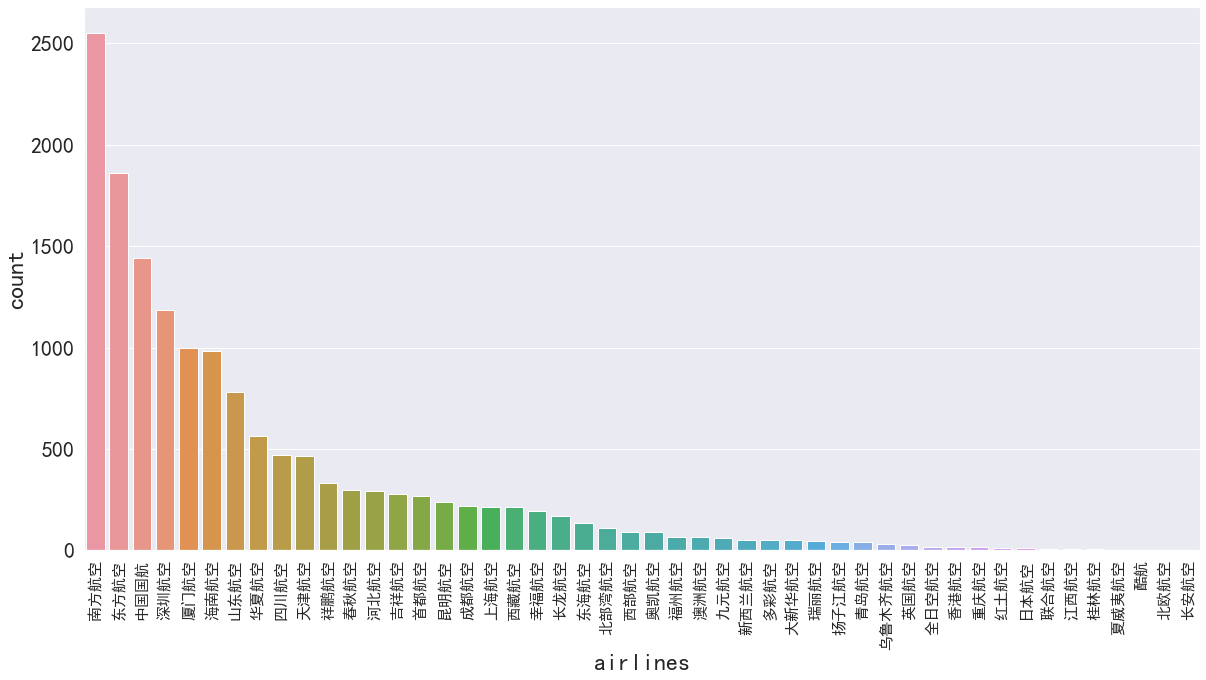

In [9]:
sns.set(font_scale=2,font='SimHei') #设置字体大小、字体（这里是黑体）
plt.figure(figsize=(20, 10))
sns.countplot(x="airlines",data=df0,order=airlines.index)#利用seaborn库的countplot函数，作出
plt.xticks(rotation=90,fontsize=15)  #改变标签显示角度，防止重叠
plt.show()

In [10]:
#统计机型分布

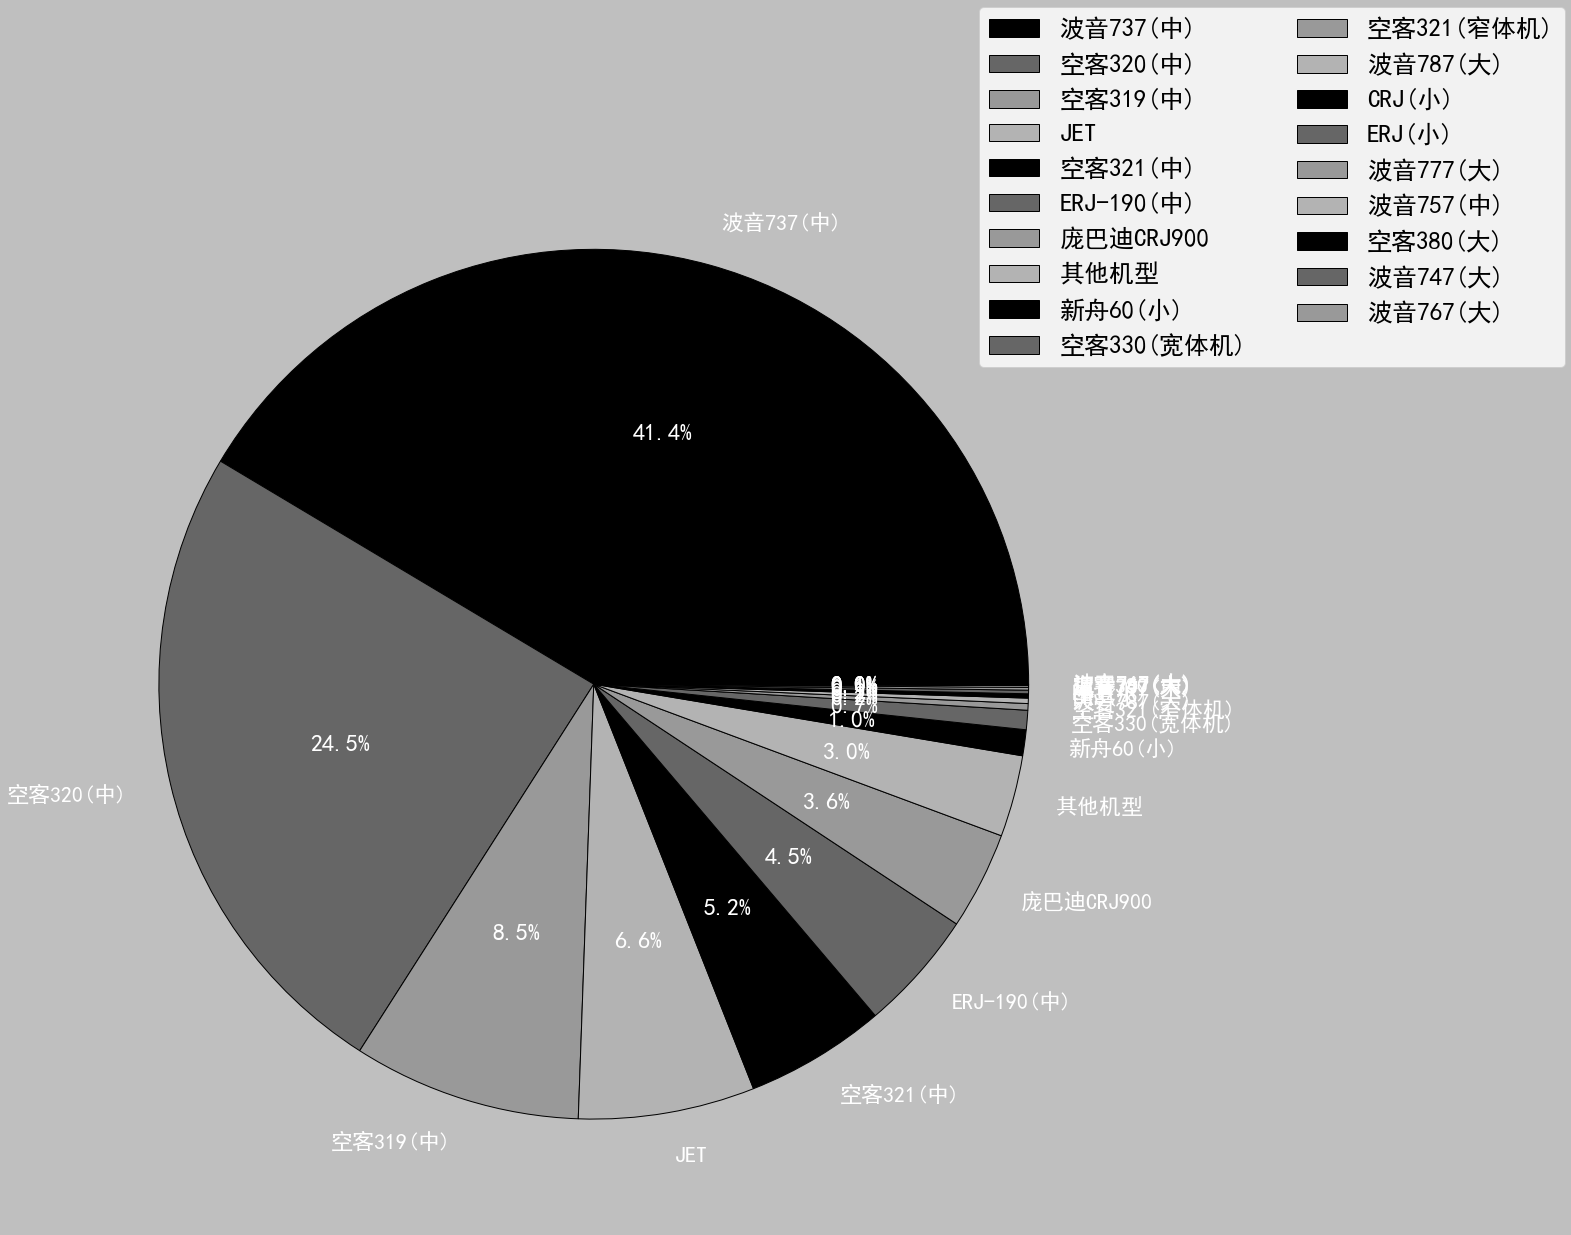

In [12]:
aircraft_models=df0["aircraft_models"].value_counts()#机型统计
#plt.style.use('grayscale') #设置为灰度图
plt.figure(figsize=(20, 20))
#plt.pie(aircraft_models,labels=aircraft_models.index,autopct='%1.1f%%')#其中labels是标注，autopct='%1.1f%%'是显示数字
plt.pie(aircraft_models,labels=aircraft_models.index,autopct='%1.1f%%',textprops=dict(color="w"))#其中labels是标注，autopct='%1.1f%%'是显示数字
plt.legend(loc="upper right",fontsize=25,ncol=2,bbox_to_anchor=(1.4,1.13),borderaxespad=0.3)
#设置图例# loc =  'upper right' 位于右上角
# bbox_to_anchor=[1.4,1.13] # 外边距 上边 右边
# ncol=2 分两列
# borderaxespad = 0.3图例的内边距


In [24]:
#绘制3D地图
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Map3D
from pyecharts.globals import ChartType
from pyecharts.charts import *

In [13]:
sizes=df0["departure_city"].value_counts()#计数统计
df1 = pd.DataFrame({'flights_amount':sizes})#格式转换
print(df1)

    flights_amount
北京             959
上海             861
重庆             680
广州             678
昆明             672
..             ...
永州               3
汉中               3
天水               2
梧州               2
塔城               1

[138 rows x 1 columns]


In [14]:
df2 = df0[['departure_city','departure_cy','departure_cx']].drop_duplicates()
#获取各个城市的名称、坐标
#drop_duplicates()用于去除重复行数据

In [15]:
df2.index = df2['departure_city']
#修改索引值为城市名，方便同'flights_amount'（航线数）合并

In [16]:
df2['flights_amount'] = df1
#增加'flights_amount'列
print(df2)

               departure_city  departure_cy  departure_cx  flights_amount
departure_city                                                           
阿克苏                       阿克苏     41.188341     80.293842              24
阿勒泰                       阿勒泰     47.890136     87.926214               3
安庆                         安庆     30.537898    117.058739               8
包头                         包头     40.647119    109.846238              60
保山                         保山     25.120489     99.177996              11
...                       ...           ...           ...             ...
昭通                         昭通     27.340633    103.725021               5
郑州                         郑州     34.756610    113.649644             347
舟山                         舟山     30.036010    122.169872              13
珠海                         珠海     22.256915    113.562447             133
芷江                         芷江     27.402510    109.611105               4

[138 rows x 4 columns]


In [17]:
city_lines = list(zip(df2['departure_city'],list(zip(df2['departure_cx'],df2['departure_cy'],df2['flights_amount']))))

In [18]:
print(city_lines)

[('阿克苏', (80.293842, 41.188341, 24)), ('阿勒泰', (87.92621436, 47.89013573, 3)), ('安庆', (117.0587388, 30.53789782, 8)), ('包头', (109.8462385, 40.64711943, 60)), ('保山', (99.17799561, 25.1204892, 11)), ('北海', (109.1226279, 21.47271824, 50)), ('北京', (116.395645, 39.92998578, 959)), ('百色', (106.6318214, 23.90151237, 15)), ('长春', (125.3136424, 43.89833761, 204)), ('长沙', (112.9793528, 28.21347823, 278)), ('长治', (113.1202921, 36.20166439, 26)), ('常德', (111.6537181, 29.01214886, 13)), ('常州', (119.981861, 31.77139674, 26)), ('成都', (104.0679235, 30.67994285, 639)), ('赤峰', (118.9307612, 42.29711232, 25)), ('重庆', (106.530635, 29.54460611, 680)), ('昌都', (97.18425, 31.145369, 8)), ('朝阳', (120.446573, 41.589103, 6)), ('达州', (107.4949734, 31.21419886, 14)), ('大理', (100.219209, 25.69396662, 22)), ('大连', (121.5934778, 38.94870994, 288)), ('丹东', (124.3385431, 40.12902283, 9)), ('东营', (118.6126431, 37.40866629, 14)), ('敦煌', (94.792135, 40.174113, 16)), ('大同', (113.311035, 40.12684, 9)), ('大庆', (125.0218397, 4

In [19]:
#绘制3D分布图

In [25]:
c = (
    Map3D()
    .add_schema(
        itemstyle_opts=opts.ItemStyleOpts(
            color="rgb(5,101,123)",
            opacity=1,
            border_width=0.8,
            border_color="rgb(62,215,213)",
        ),
        map3d_label=opts.Map3DLabelOpts(
            is_show=False,
            # formatter=JsCode("function(data){return data.name + " " + data.value[2];}"),
        ),
        emphasis_label_opts=opts.LabelOpts(
            is_show=False,
            color="#fff",
            font_size=10,
            background_color="rgba(0,23,11,0)",
        ),
        light_opts=opts.Map3DLightOpts(
            main_color="#fff",
            main_intensity=1.2,
            main_shadow_quality="high",
            is_main_shadow=False,
            main_beta=10,
            ambient_intensity=0.3,
        ),
    )
    .add(
        series_name="机场所在城市分布图",
        data_pair=city_lines,#数据改为前文生成的数据
        type_=ChartType.BAR3D,
        bar_size=1,
        shading="lambert",
        label_opts=opts.LabelOpts(
            is_show=False,
            # formatter=JsCode("function(data){return data.name + ' ' + data.value[2];}"),
        ),
    )
    .set_global_opts(visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                       pieces=[{"min":800, "label": '>800',"color": 'blue'},#各个区间柱状图颜色
                               {"min":500, "max":799, "label": '500-799',"color": 'red'},
                               {"min":200, "max":499, "label": '200-499',"color": 'peru'},
                               {"min":100, "max":199, "label": '100-199',"color":'orange'},
                               {"min":10, "max":99, "label": '10-99',"color":'gold'},
                               {"min":0, "max":9, "label": '0-9',"color":'cornsilk'}])
        )
    .render("D:/2022_py_code/Afterclass_practice/04第四章 02_map3d_with_bar3d.html")
)

In [27]:
#绘制从首都机场出发的各航线的桑基图（可以用来表达数据的流向和数量）
from pyecharts import options as opts
from pyecharts.charts import Sankey
import pandas as pd

In [28]:
df1 = df0[df0.departure_airport=='首都机场'] #筛选出“departure_airport”列首都机场的数据

In [29]:
sizes=df1["landing_airport"].value_counts()#统计首都机场出发的目的地机场航线数量

In [30]:
print(sizes)
print(type(sizes))

江北机场     45
咸阳机场     39
萧山机场     38
太平机场     37
天河机场     36
         ..
潍坊机场      1
井冈山机场     1
保安营机场     1
伊春机场      1
交河机场      1
Name: landing_airport, Length: 134, dtype: int64
<class 'pandas.core.series.Series'>


In [31]:
df2 = pd.DataFrame({'value':sizes})#格式转换

In [32]:
df2['source'] = '首都机场' #增加1列数据，方便转换成桑基图需要的数据类型

In [34]:
df3 = df2.reset_index()#重置索引
print(df3)

     index  value source
0     江北机场     45   首都机场
1     咸阳机场     39   首都机场
2     萧山机场     38   首都机场
3     太平机场     37   首都机场
4     天河机场     36   首都机场
..     ...    ...    ...
129   潍坊机场      1   首都机场
130  井冈山机场      1   首都机场
131  保安营机场      1   首都机场
132   伊春机场      1   首都机场
133   交河机场      1   首都机场

[134 rows x 3 columns]


In [35]:
df4 = df3[:30]#取航线数排序前30的机场

In [36]:
df5 = df4.rename(columns={'index':'target'})#修改列名
df6 = df5[['source','target','value']]#变换数据顺序，方便转换成桑基图需要的数据类型

In [37]:
print(df6)

   source  target  value
0    首都机场    江北机场     45
1    首都机场    咸阳机场     39
2    首都机场    萧山机场     38
3    首都机场    太平机场     37
4    首都机场    天河机场     36
5    首都机场    长水机场     33
6    首都机场    宝安机场     32
7    首都机场    河东机场     28
8    首都机场   周水子机场     28
9    首都机场    中川机场     27
10   首都机场    白云机场     23
11   首都机场    虹桥机场     20
12   首都机场   地窝堡机场     20
13   首都机场    龙嘉机场     19
14   首都机场   龙洞堡机场     19
15   首都机场  蓬莱国际机场     17
16   首都机场    双流机场     17
17   首都机场    高崎机场     16
18   首都机场    禄口机场     16
19   首都机场    凤凰机场     14
20   首都机场    长乐机场     14
21   首都机场   二里半机场     13
22   首都机场    黄花机场     12
23   首都机场    两江机场     12
24   首都机场    昌北机场     12
25   首都机场    美兰机场     12
26   首都机场    栎社机场     11
27   首都机场    武宿机场     11
28   首都机场    桃仙机场     10
29   首都机场    金湾机场     10


In [ ]:
#生成nodes、links数据

In [38]:
#生成nodes
nodes = []
nodes.append({'name':'首都机场'})
for i in df6['target']:
    dic = {}
    dic['name'] = i
    nodes.append(dic)

print(nodes)

[{'name': '首都机场'}, {'name': '江北机场'}, {'name': '咸阳机场'}, {'name': '萧山机场'}, {'name': '太平机场'}, {'name': '天河机场'}, {'name': '长水机场'}, {'name': '宝安机场'}, {'name': '河东机场'}, {'name': '周水子机场'}, {'name': '中川机场'}, {'name': '白云机场'}, {'name': '虹桥机场'}, {'name': '地窝堡机场'}, {'name': '龙嘉机场'}, {'name': '龙洞堡机场'}, {'name': '蓬莱国际机场'}, {'name': '双流机场'}, {'name': '高崎机场'}, {'name': '禄口机场'}, {'name': '凤凰机场'}, {'name': '长乐机场'}, {'name': '二里半机场'}, {'name': '黄花机场'}, {'name': '两江机场'}, {'name': '昌北机场'}, {'name': '美兰机场'}, {'name': '栎社机场'}, {'name': '武宿机场'}, {'name': '桃仙机场'}, {'name': '金湾机场'}]


In [39]:
#生成links
links = []
for i in df6.values:
    dic = {}
    dic['source'] = i[0]
    dic['target'] = i[1]
    dic['value'] = i[2]
    links.append(dic)

print(links)

[{'source': '首都机场', 'target': '江北机场', 'value': 45}, {'source': '首都机场', 'target': '咸阳机场', 'value': 39}, {'source': '首都机场', 'target': '萧山机场', 'value': 38}, {'source': '首都机场', 'target': '太平机场', 'value': 37}, {'source': '首都机场', 'target': '天河机场', 'value': 36}, {'source': '首都机场', 'target': '长水机场', 'value': 33}, {'source': '首都机场', 'target': '宝安机场', 'value': 32}, {'source': '首都机场', 'target': '河东机场', 'value': 28}, {'source': '首都机场', 'target': '周水子机场', 'value': 28}, {'source': '首都机场', 'target': '中川机场', 'value': 27}, {'source': '首都机场', 'target': '白云机场', 'value': 23}, {'source': '首都机场', 'target': '虹桥机场', 'value': 20}, {'source': '首都机场', 'target': '地窝堡机场', 'value': 20}, {'source': '首都机场', 'target': '龙嘉机场', 'value': 19}, {'source': '首都机场', 'target': '龙洞堡机场', 'value': 19}, {'source': '首都机场', 'target': '蓬莱国际机场', 'value': 17}, {'source': '首都机场', 'target': '双流机场', 'value': 17}, {'source': '首都机场', 'target': '高崎机场', 'value': 16}, {'source': '首都机场', 'target': '禄口机场', 'value': 16}, {'source': '首都机场', 'targe

In [40]:
#生成桑基图
c = (
    Sankey()
    .add(
        "首都机场出发（前30）",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.1, color="source"),
        label_opts=opts.LabelOpts(position="right"),
    )
    # .set_global_opts(title_opts=opts.TitleOpts(title="首都机场出发（后30）"))
    .render("D:/2022_py_code/Afterclass_practice/03桑基图（前30）.html")
)

In [44]:
#绘制关系图
import pandas as pd
import numpy as np

In [45]:
df0['time'] =  (pd.to_datetime(df0['landing_time']) - pd.to_datetime(df0['departure_time'])).values/np.timedelta64(1, 'h')

In [46]:
df1 = df0[df0.time<0] #筛选出'time'列小于0的数据（着陆时间为次日的情况）

In [47]:
df1['time'] = df1['time'] + 24 #将隔天的小于0的航班时间，加上24，转换为实际飞行时间

<ipython-input-47-b2ef3f1b1bc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = df1['time'] + 24 #将隔天的小于0的航班时间，加上24，转换为实际飞行时间


In [48]:
df2 = df0[df0.time>=0] #筛选出大于等于0的数据

In [49]:
df3 = pd.concat([df1,df2],axis=0)#按行连接两个数据帧。将小于0，大于等于0的数据重新拼接成新的数据集

In [50]:
 print(df3)

      departure_city  departure_cy  departure_cx landing_city  landing_cy  \
41                包头     40.647119    109.846238           北京   39.929986   
42                包头     40.647119    109.846238           北京   39.929986   
43                包头     40.647119    109.846238           北京   39.929986   
44                包头     40.647119    109.846238           北京   39.929986   
45                包头     40.647119    109.846238           北京   39.929986   
...              ...           ...           ...          ...         ...   
15069             珠海     22.256915    113.562447           遵义   27.699961   
15070             芷江     27.402510    109.611105           昆明   25.049153   
15071             芷江     27.402510    109.611105           昆明   25.049153   
15072             芷江     27.402510    109.611105           上海   31.249162   
15073             芷江     27.402510    109.611105           西安   34.347507   

       landing_cx  mileage flight_schedules airlines aircraft_models  ...  

In [51]:
#新建中转时间空矩阵

In [52]:
departure_city = df3["departure_city"].value_counts()  #离港城市统计
print(len(departure_city))

138


In [53]:
landing_city = df3["landing_city"].value_counts()  #着陆城市统计
print(len(landing_city))

185


In [54]:
all_city = list((departure_city.index).union(landing_city.index))#求并集，即求出所有有机场的城市
print(all_city)

['万州', '三亚', '上海', '东营', '中卫', '临沂', '临沧', '丹东', '丽江', '义乌', '乌兰浩特', '乌海', '乌鲁木齐', '二连浩特', '井冈山', '伊宁', '伊春', '佛山', '佳木斯', '保山', '克拉玛依', '兰州', '兴义', '凯里', '加格达奇', '包头', '北京', '北海', '南京', '南充', '南宁', '南昌', '南通', '南阳', '厦门', '台州', '合肥', '吐鲁番', '吕梁', '呼和浩特', '和田', '哈密', '哈尔滨', '唐山', '喀什', '嘉峪关', '固原', '塔城', '夏河', '大同', '大庆', '大理', '大连', '天水', '天津', '太原', '威海', '宁波', '安庆', '安顺', '宜宾', '宜昌', '宜春', '富蕴', '巴彦淖尔', '常州', '常德', '广元', '广州', '庆阳', '库尔勒', '库车', '康定', '延吉', '延安', '张家口', '张家界', '张掖', '徐州', '恩施', '惠州', '成都', '扬州', '拉萨', '揭阳', '攀枝花', '敦煌', '无锡', '日喀则', '昆明', '昌都', '昭通', '普洱', '景德镇', '朝阳', '杭州', '林芝', '柳州', '格尔木', '桂林', '梅县', '梧州', '榆林', '武夷山', '武汉', '毕节', '永州', '汉中', '池州', '沈阳', '泸州', '洛阳', '济南', '济宁', '海口', '海拉尔', '淮安', '深圳', '温州', '湛江', '满洲里', '漠河', '潍坊', '烟台', '牡丹江', '玉树', '珠海', '百色', '盐城', '石家庄', '福州', '稻城', '绵阳', '腾冲', '舟山', '芒市', '芷江', '荔波', '衡阳', '衢州', '襄阳(中国)', '西双版纳', '西宁', '西安', '西昌', '贵阳', '赣州', '赤峰', '达州', '运城', '连云港', '连城', '通化', '通辽', '遵义', '那拉提', '邯郸', '郑州', '鄂尔多斯', '重庆'

In [55]:
df_time = pd.DataFrame(columns=all_city, index=all_city)  #新建所有含机场的城市的空矩阵

In [56]:
#计算所有直飞航班时间

In [57]:
for i in all_city:
    for j in all_city:
        if i == j:
              df_time.at[i,j]=0  #如果出发城市和到达城市相同，则设置时间为0
        else:
            df_dep = df3[df3.departure_city==i]   #选取出发城市
            df_dep_lan = df_dep[df_dep.landing_city==j] #选取到达城市
            df_time.at[i,j] = df_dep_lan['time'].mean()#计算从出发城市到到达城市的平均时间
print(df_time)

        万州       三亚       上海   东营       中卫    临沂   临沧       丹东       丽江  \
万州       0      NaN  2.20833  NaN      NaN   NaN  NaN      NaN      NaN   
三亚     NaN        0  3.10294  NaN      NaN   NaN  NaN      NaN      NaN   
上海    2.75  3.61275        0    2  5.41667  1.75  NaN  3.29167  4.81667   
东营     NaN      NaN   1.9375    0      NaN   NaN  NaN      NaN      NaN   
中卫     NaN      NaN      NaN  NaN        0   NaN  NaN      NaN      NaN   
...    ...      ...      ...  ...      ...   ...  ...      ...      ...   
黄山     NaN      NaN  1.04167  NaN      NaN   NaN  NaN      NaN      NaN   
黎平     NaN      NaN      NaN  NaN      NaN   NaN  NaN      NaN      NaN   
黑河     NaN      NaN  5.41667  NaN      NaN   NaN  NaN      NaN      NaN   
黔江     NaN      NaN      NaN  NaN      NaN   NaN  NaN      NaN      NaN   
齐齐哈尔   NaN      NaN  4.33333  NaN      NaN   NaN  NaN      NaN      NaN   

           义乌  ...       青岛       鞍山 额济纳旗 香格里拉       鸡西       黄山       黎平  \
万州        NaN  ...    

In [65]:
df_time.to_excel('D:/2022_py_code/Afterclass_practice/04第四章_05-line_time.xlsx')

In [59]:
#利用floyd算法求解一次转机最快飞行时间矩阵

In [ ]:
def Floyd(G): #定义Floyd函数
    '''
    G:所有直连节点的距离数据矩阵
    '''   
    all_city = list(G.index)#
#    print(all_city)
    for k in all_city:
        for i in all_city:
            for j in all_city:
                G.at[i,j] = min(G.at[i,j],G.at[i,k]+G.at[k,j]+2)#转机时间设置为2小时
                # G.at[i,j] = min(G.at[i,j],G.at[i,k]+G.at[k,j])#转机时间为0
    return G

In [ ]:
if __name__ == '__main__':  
    df0=pd.read_excel("D:/2022_py_code/Afterclass_practice/04第四章_05-line_time.xlsx",index_col=0)
    maxTime = 1000000   #用一个较大的数代替∞
    df1 = df0.fillna(value=maxTime)#填充缺失值（无法直连的节点距离） 
    Floyd_time = Floyd(df1)#调用Floyd函数，求解通过1次转机可以得出的所有直连航班的最短时间
    print(Floyd_time)


In [ ]:
Floyd_time.to_excel("D:/2022_py_code/Afterclass_practice/04第四章_08-line_time(2h).xlsx")

In [ ]:
df0=pd.read_excel("D:/2022_py_code/Afterclass_practice/04第四章_05-line_time.xlsx",index_col=0)


In [ ]:
df0["mean"]=df0.mean(axis=1)#对每行求平均值

In [ ]:
mean_time = df0.sort_values(by="mean") #按平均时间升序排序

In [72]:
print(mean_time['mean'])

普洱      0.000000
淮安      0.000000
巴彦淖尔    0.000000
毕节      0.000000
吐鲁番     0.000000
          ...   
三亚      3.474946
大庆      3.569444
阿克苏     3.614846
乌鲁木齐    3.788902
喀什      3.861944
Name: mean, Length: 185, dtype: float64


In [73]:
radius = mean_time['mean'][:'漠河'].round(2)# #截取到漠河的数据，round(2)保留2位小数

In [74]:
print(radius)
print(len(radius))

普洱        0.00
淮安        0.00
巴彦淖尔      0.00
毕节        0.00
吐鲁番       0.00
吕梁        0.00
林芝        0.00
唐山        0.00
黔江        0.00
固原        0.00
夏河        0.00
稻城        0.00
日喀则       0.00
扬州        0.00
惠州        0.00
张掖        0.00
张家口       0.00
康定        0.00
安顺        0.00
库车        0.00
庆阳        0.00
宜春        0.00
富蕴        0.00
揭阳        0.00
腾冲        0.00
池州        0.00
遵义        0.00
黎平        0.00
额济纳旗      0.00
鞍山        0.00
中卫        0.00
阿里        0.00
阿拉善左旗     0.00
阿尔山       0.00
长白山       0.00
金昌        0.00
那拉提       0.00
二连浩特      0.00
荔波        0.00
佛山        0.00
广元        0.00
加格达奇      0.00
凯里        0.00
通化        0.00
连城        0.00
衡阳        0.00
襄阳(中国)    0.00
阿勒泰       0.53
塔城        0.58
天水        0.62
玉树        0.90
和田        0.92
永州        1.04
锡林浩特      1.04
梧州        1.14
衢州        1.17
武夷山       1.19
芷江        1.35
昭通        1.36
漠河        1.40
Name: mean, dtype: float64
60


In [75]:
x_data = radius.index
y_data = radius.values
data_pair = [list(z) for z in zip(x_data, y_data)]
data_pair.sort(key=lambda x: x[1])

In [77]:
sns.set(font_scale=2,font='SimHei') 
(
    Pie(init_opts=opts.InitOpts(width="5000px", height="5000px"))
    .add(
        series_name="平均转机时间",
        data_pair=data_pair,
        rosetype="area",#是否展示成南丁格尔图，通过半径区分数据大小，有'radius'和'area'两种模式。
                        #默认为radius。radius：扇区圆心角展现数据的百分比，半径展现数据的大小；
                        #area：所有扇区圆心角相同，仅通过半径展现数据大小。
        radius=["20%", "80%"],#radius：饼图的半径，第一项是内半径，第二项是外半径
        center=["50%", "50%"],#center：饼图的中心（圆心）坐标，第一项是横坐标，第二项是纵坐标
    )
    .set_global_opts(#设置全局变量
                      title_opts=opts.TitleOpts(title="南丁格尔玫瑰图",#设置标题名称
                                                title_textstyle_opts=opts.TextStyleOpts(font_size=40), #设置标题字体格式
                                                pos_right='center', 
                                                pos_left='center', 
                                                pos_bottom='center' #设置标题位置
                                                ),
                      legend_opts=opts.LegendOpts(is_show=False),
    )
    .set_series_opts(#设置系列配置项
                      label_opts=opts.LabelOpts(formatter="{b}: {c}",#标签内容
                                                position='inside',#设置标签位置
                                                rotate=True,#设置标签旋转
                                                font_size=35,#设置标签字体大小
                                                distance=100),
                      )
    .render("D:/2022_py_code/Afterclass_practice/07customized_pie.html")
)





TypeError: __init__() got an unexpected keyword argument 'distance'